In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_ETH3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,down,2018-09-05 12:00:00,GCPanel,1,1,#ethereum #Crypto #shareasmile #Startup #Smart...,"Happy Teacher's Day 2018: Teachers, these heal..."
1,ETH,down,2018-09-05 12:00:00,CryptoGulp,0,0,NaN,Top 5 Cryptocurrencies - Current Prices Bitcoi...
2,ETH,down,2018-09-05 12:00:00,eth_hourly,0,0,#ethereum,"Current #ethereum price is $257.38, a decrease..."
3,ETH,down,2018-09-05 12:00:00,AltcoinTicker,0,0,#bitcoin #bitcoin #crypto #altcoin #bot,Today's Top 5 Coins 1. Bitcoin 7004.41013108$2...
4,ETH,down,2018-09-05 12:00:01,asens_inc,0,0,#Bitcoin #Bitcoin #NEM #XEM #Monacoin #Ethereu...,"09/05 21:00現在 #Bitcoin : 781,500円↓ #NEM #XEM :..."
...,...,...,...,...,...,...,...,...
2609,ETH,down,2018-09-05 17:59:15,David91Fry,0,0,#BitexGlobal #TokenSale #ICO #bitcoin #bitcoin...,How to stop surviving and start living? I can ...
2610,ETH,down,2018-09-05 17:59:33,SooraSaab,0,0,#technology #apple #facebook #automobile,Best mining PC 2018: the best desktop PCs for ...
2611,ETH,down,2018-09-05 17:59:33,CryptoRookies,3,6,#blockchain #debit #card #cryptocard #cryptocu...,"Update from @amonwallet, including James’ inte..."
2612,ETH,down,2018-09-05 17:59:48,yavuzsyildiz,5,51,#Holochain,Neden #Holochain'in gerekli olduğunu ve Ethere...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [happy, teacher, 's, day, 2018, :, teachers, ,...
1       [top, 5, cryptocurrencies, current, prices, bi...
2       [current, ethereum, price, is, $, 257.38, ,, a...
3       [today, 's, top, 5, coins, 1, ., bitcoin, 7004...
4       [09, 05, 21:00現在, bitcoin, :, 781,500円↓, nem, ...
                              ...                        
2609    [how, to, stop, surviving, and, start, living,...
2610    [best, mining, pc, 2018, :, the, best, desktop...
2611    [update, from, @, amonwallet, ,, including, ja...
2612    [neden, holochain'in, gerekli, olduğunu, ve, e...
2613    [although, you, can, call, out, bulltards, tha...
Name: text, Length: 2614, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [happy, teacher, 's, day, :, teachers, ,, heal...
1       [top, cryptocurrencies, current, prices, bitco...
2       [current, ethereum, price, $, ,, decrease, %, ...
3       [today, 's, top, coins, ., bitcoin, $, ., ethe...
4       [bitcoin, :, nem, xem, :, monacoin, :, ethereu...
                              ...                        
2609    [stop, surviving, start, living, ?, help, find...
2610    [best, mining, pc, :, best, desktop, pcs, mini...
2611    [update, @, amonwallet, ,, including, james, ’...
2612    [neden, holochain'in, gerekli, olduğunu, ether...
2613    [call, bulltards, calling, trash, ta, saying, ...
Name: text, Length: 2614, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

5896

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

5896


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

5896

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

5896

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

320.4425167519179

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0023355089401692064

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.19420607417357907

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12,"[0.06691505759954453, -0.5771099925041199, 0.2...",ethereum,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000083,0.761972,0.238111,NaN
20,"[0.029003487899899483, -0.42271021008491516, 0...",bitcoin,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000499,0.435521,0.564978,NaN
61,"[0.04120746999979019, -0.4623408615589142, 0.2...",blockchain,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000098,0.261161,0.738937,NaN
13,"[0.03897925838828087, -0.39080753922462463, 0....",crypto,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000092,0.207765,0.792328,NaN
30,"[0.038837309926748276, -0.4014494717121124, 0....",cryptocurrency,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000090,0.170311,0.829779,NaN
53,"[0.022273018956184387, -0.3241032660007477, 0....",news,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000178,0.085788,0.914390,NaN
70,"[0.04909262806177139, -0.4139898717403412, 0.1...",token,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000087,0.069086,0.931001,NaN
33,"[0.020641522482037544, -0.2530156075954437, 0....",ripple,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000555,0.068327,0.932228,NaN
32,"[0.015379008837044239, -0.28540483117103577, 0...",litecoin,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000434,0.065543,0.934891,NaN
95,"[0.01787925697863102, -0.26264554262161255, 0....",trade,0,"[0.002497879, -0.025991738, 0.011631176, -0.01...",0.000291,0.054662,0.945629,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
19,"[0.010253979824483395, -0.20121082663536072, 0...",price,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.001634,0.079715,0.921919,NaN
276,"[-0.0037989530246704817, -0.16353677213191986,...",drop,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.001339,0.050866,0.950474,NaN
47,"[-0.0031680953688919544, -0.12860225141048431,...",minute,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.005447,0.048082,0.957365,NaN
166,"[0.001247563399374485, -0.19869652390480042, 0...",crash,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.000649,0.022776,0.977873,NaN
21,"[0.006669073831290007, -0.08823069930076599, 0...",cash,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.003433,0.025053,0.978380,NaN
783,"[0.007024029735475779, -0.17476996779441833, 0...",article,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.001103,0.015437,0.985666,NaN
44,"[-0.004705136641860008, -0.12291359901428223, ...",bear,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.002727,0.015943,0.986784,NaN
722,"[-0.011940980330109596, -0.06503236293792725, ...",plunge,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.013186,0.021004,0.992182,NaN
46,"[-0.020000385120511055, -0.08613631874322891, ...",plummet,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.020159,0.021763,0.998396,NaN
2008,"[0.000263841386185959, -0.03909933939576149, 0...",slip,1,"[-0.00018380838, -0.007910964, 0.0043992656, -...",0.003146,0.003796,0.999350,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3112,"[0.0044124433770775795, -0.01632363349199295, ...",unusual,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.021203,0.000506,1.020697,NaN
522,"[0.003632031148299575, -0.0057484665885567665,...",settlement,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.032072,0.000759,1.031313,NaN
4763,"[-0.0001939973735716194, -0.011747471056878567...",abbreviation,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.034325,0.000253,1.034072,NaN
5050,"[-0.0015384758589789271, -0.005410607438534498...",viewable,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.034812,0.000253,1.034559,NaN
5074,"[0.005767448805272579, -0.004357911180704832, ...",steel,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.036385,0.000506,1.035879,NaN
272,"[0.004056279081851244, -0.01210267934948206, 0...",tokyo,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.036934,0.000253,1.036681,NaN
1362,"[-0.0004527890123426914, -0.008524465374648571...",modelo,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.040669,0.000506,1.040163,NaN
487,"[0.0034103230573236942, -0.010134660638868809,...",multiplicarán,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.040942,0.000253,1.040689,NaN
5011,"[-0.003920142538845539, -0.007019692100584507,...",anonymity,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.041356,0.000506,1.040849,NaN
2337,"[-0.004283299203962088, -0.00910933967679739, ...",ethsanfrancisco,2,"[0.00037019304, -0.0037060424, 0.002102073, -0...",0.041141,0.000253,1.040888,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3399,"[0.0028690402396023273, 0.006492643617093563, ...",emfrmq,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.041395,0.000506,1.040889,NaN
1222,"[-0.0004551649617496878, 0.003056775312870741,...",xblock,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.095562,0.002278,1.093285,NaN
4978,"[0.0031435545533895493, 0.0010529628489166498,...",guruji,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.109419,0.000253,1.109166,NaN
303,"[-0.0006851596408523619, 0.009370139800012112,...",viewo,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.112681,0.000506,1.112175,NaN
5305,"[-0.003612018655985594, 0.004718848969787359, ...",makemoneyonline,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.136421,0.000253,1.136168,NaN
912,"[0.0010630637407302856, -0.0005366257391870022...",vivafam,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.166954,0.000253,1.166701,NaN
2972,"[0.00041002564830705523, 0.0034815766848623753...",iotchain,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.184275,0.000506,1.183769,NaN
1174,"[-0.00363686284981668, 0.003331536427140236, -...",cryptochallenge,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.200187,0.000253,1.199934,NaN
1947,"[-0.0043314797803759575, 0.003805682295933366,...",cryptocashbackrebate,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.204771,0.000253,1.204518,NaN
3957,"[-0.0032605791930109262, 0.005385361146181822,...",cryptofacil,3,"[-8.3946645e-05, 0.001465887, -0.00084256293, ...",0.215744,0.000253,1.215491,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

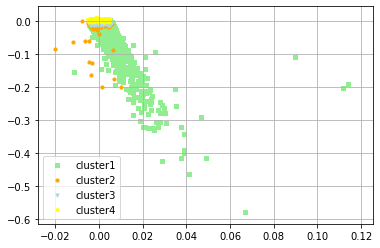

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

4714

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

723

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

363

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

96

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 # 부정

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 5 # 이슈

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

107.50505065917969

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 0 0 ... 0 0 0]


In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-107.50505065917969


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.70399374


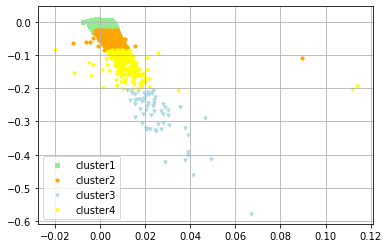

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 기술한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2146,"[-0.0006715063937008381, -0.01005405094474554,...",definition,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.025528,0.000759,1.024769,NaN
5204,"[0.004969643894582987, -0.00987268891185522, 0...",blockchaintech,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.025039,0.000253,1.024786,NaN
164,"[0.002623569453135133, -0.011310389265418053, ...",alternative,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.025591,0.000759,1.024832,NaN
3503,"[0.0040509686805307865, -0.013419587165117264,...",federadiove,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.025312,0.000253,1.025059,NaN
2552,"[-0.001669031218625605, -0.013129771687090397,...",acteurs,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.025904,0.000253,1.025651,NaN
5543,"[0.0038003709632903337, -0.00875772349536419, ...",accelerator,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.026192,0.000506,1.025686,NaN
4419,"[-0.0022837466094642878, -0.010935695841908455...",fintechbeer,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.026265,0.000506,1.025759,NaN
3607,"[0.004349364899098873, -0.009166566655039787, ...",bcunchained,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.026097,0.000253,1.025844,NaN
1279,"[0.0021596497390419245, -0.011958586983382702,...",buylocal,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.026419,0.000506,1.025913,NaN
5283,"[0.0034015709534287453, -0.011601291596889496,...",tothemoon,0,"[0.0009072344, -0.010218435, 0.0046204985, -0....",0.026171,0.000253,1.025918,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
41,"[0.0064803119748830795, -0.05036097764968872, ...",volume,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.029350,0.005567,1.023783,NaN
175,"[0.00958988443017006, -0.05299442633986473, 0....",twitter,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.029425,0.005061,1.024363,NaN
2139,"[0.001675825915299356, -0.04565107077360153, 0...",logistics,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.026320,0.001518,1.024802,NaN
2336,"[0.0012835330562666059, -0.0479809008538723, 0...",hack,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.026883,0.001771,1.025112,NaN
3384,"[0.0026276155840605497, -0.04872323200106621, ...",japan,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.028562,0.002025,1.026537,NaN
2952,"[0.0010175120551139116, -0.043309535831213, 0....",wednesday,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.028839,0.002278,1.026562,NaN
998,"[0.0035922720562666655, -0.04201842099428177, ...",scalability,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.028605,0.002025,1.026580,NaN
1317,"[0.0027912079822272062, -0.04606453701853752, ...",ethl,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.028628,0.002025,1.026603,NaN
1384,"[0.006902826949954033, -0.05080466344952583, 0...",kripto,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.027935,0.001265,1.026670,NaN
4057,"[0.0054986667819321156, -0.051916416734457016,...",idea,1,"[0.0044832267, -0.047573224, 0.021405296, -0.0...",0.028402,0.001518,1.026883,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
32,"[0.015379008837044239, -0.28540483117103577, 0...",litecoin,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.079055,0.065543,1.013512,NaN
576,"[0.030040757730603218, -0.28018462657928467, 0...",make,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.043781,0.013918,1.029862,NaN
95,"[0.01787925697863102, -0.26264554262161255, 0....",trade,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.099742,0.054662,1.045080,NaN
942,"[0.022643759846687317, -0.2815123498439789, 0....",smart,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.060522,0.015437,1.045085,NaN
97,"[0.01903691701591015, -0.2761392891407013, 0.1...",bitcoincash,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.079900,0.030114,1.049786,NaN
203,"[0.02686617337167263, -0.2684573829174042, 0.1...",currency,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.071907,0.014931,1.056976,NaN
588,"[0.02384370006620884, -0.26886576414108276, 0....",link,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.096095,0.012400,1.083695,NaN
322,"[0.028021184727549553, -0.27833160758018494, 0...",google,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.141802,0.040490,1.101312,NaN
500,"[0.04662085697054863, -0.2906966805458069, 0.1...",support,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.134994,0.029355,1.105638,NaN
337,"[0.029973529279232025, -0.26475200057029724, 0...",airdrop,2,"[0.025092345, -0.27959836, 0.12675892, -0.1117...",0.206397,0.039731,1.166666,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
392,"[0.009562012739479542, -0.13056261837482452, 0...",protocol,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.029258,0.005061,1.024196,NaN
2630,"[0.008862888440489769, -0.12694716453552246, 0...",para,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.029855,0.004302,1.025553,NaN
149,"[0.01065633725374937, -0.12767013907432556, 0....",hold,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.030908,0.005061,1.025847,NaN
916,"[0.010930617339909077, -0.12388833612203598, 0...",real,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.031502,0.005567,1.025935,NaN
457,"[0.009762199595570564, -0.12799175083637238, 0...",finance,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.033880,0.007845,1.026036,NaN
1983,"[0.015573844313621521, -0.12680935859680176, 0...",marketplace,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.030247,0.003796,1.026451,NaN
667,"[0.008763303980231285, -0.12677794694900513, 0...",next,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.033797,0.005820,1.027976,NaN
953,"[0.010760119184851646, -0.1290442943572998, 0....",list,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.038364,0.008098,1.030266,NaN
447,"[0.0077390121296048164, -0.12406603991985321, ...",interest,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.039594,0.005820,1.033774,NaN
305,"[0.006705836392939091, -0.12447244673967361, 0...",best,3,"[0.011521327, -0.12609085, 0.057998437, -0.050...",0.044004,0.008604,1.035400,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 기술

4893

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 이슈

722

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 거래소

63

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 비즈

218

In [101]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 4 # 기술한계

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [105]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 7 # 비즈

In [106]:
temp_cluster_result1['Silhouette'] = 0.70399374
temp_cluster_result['Silhouette'] = 0.70399374
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [ ]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_ETC3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_ETC3_cosine")